<h2> Demo 1: Evaluating Regression Models </h2>

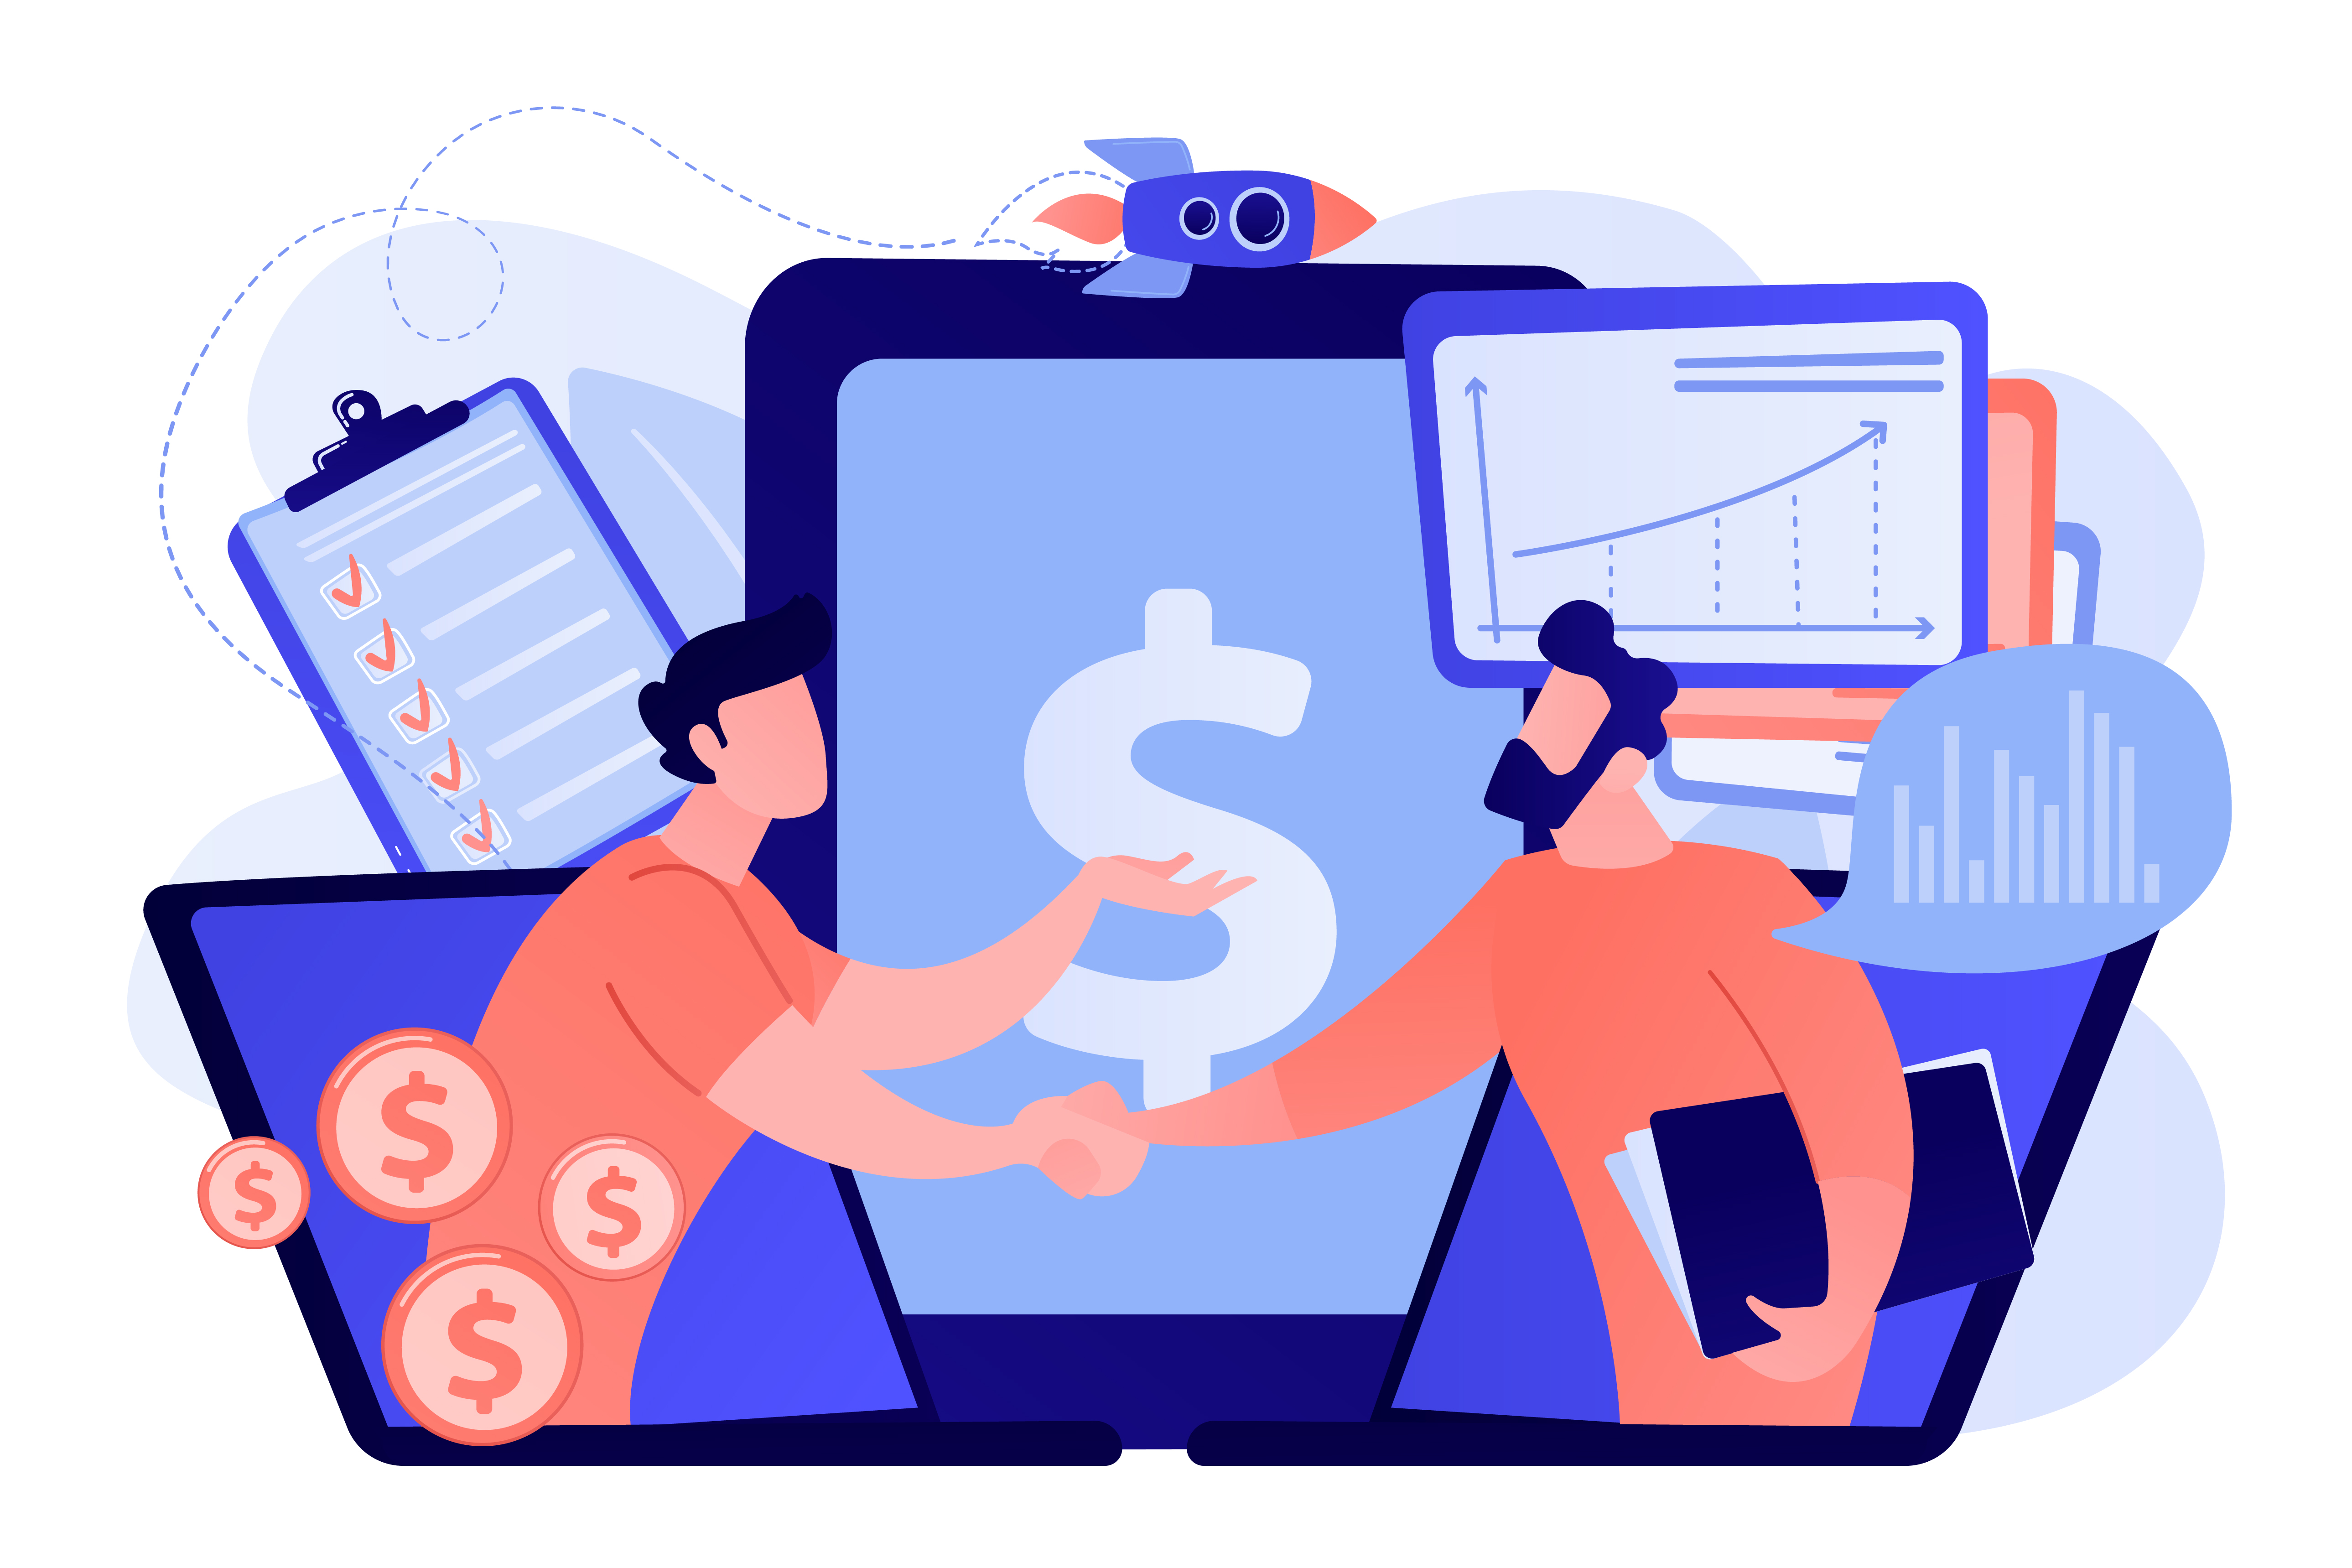

**Scenario**

Vishal Mega Mart is a leading supermart chain in India but this year christmas sale was not the kind of sale they usually used to have.

* Due to this sudden fall, management  of Vishal Mega Mart
wants to understand the reason behind this fall and hires Data Scientist from so that it can be avoided in futre
* Given the dataset the Data Scientist want to understand what factors play a major role is the sales




**Data**


* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.


**Importing relevant libraries**

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [6]:
#!wget https://www.dropbox.com/s/ipa2nl89d395x40/1260_m3_Evaluating_Regression_models_csv.csv?dl=0

In [7]:
data = pd.read_csv("Evaluating_Regression_models_csv.csv")


**Understanding the Data**

In [8]:
data.shape

(8523, 12)

**Inference** - The Dataset contains 8523 values with 12 columns

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data.isnull().sum()/data.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**Inference** - The Dataset conatins 17% missing values in Item weight column and 28% missing value in Outlet Size

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
categorical = data.select_dtypes(include =[np.object_])
print("Categorical Features in data Set:",categorical.shape[1]) # No. of columns of object type

numerical= data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in data Set:",numerical.shape[1]) # No. of columns of float or int type

Categorical Features in data Set: 7
Numerical Features in data Set: 5


In [17]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Cleaning the data**

Why cleaning the data is important ?


> If the data is not cleaned and used as it is, it will drastic affect the model accuracy because of errors.


> There is a high chance that the model will be baised due to the data set imbalance and the redundancy





* Checking null values of Item_Weight




In [145]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
data['Item_Weight'].isnull().sum()

np.int64(1463)

<Axes: xlabel='Item_Weight'>

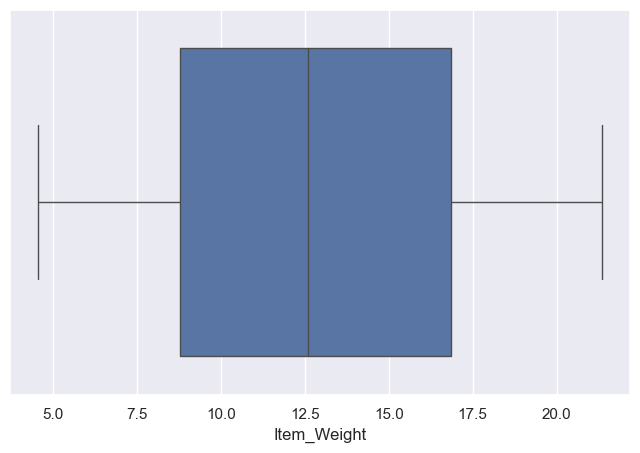

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Item_Weight', data=data)

**Inference** - The Box Plot shows no outliers hence we can go ahed and impute the missing values with the mean

In [20]:
data['Item_Weight']= data['Item_Weight'].fillna(data['Item_Weight'].mean())


In [21]:
data['Item_Weight'].isnull().sum()

np.int64(0)

**Inference** - The null values are removed successfully


 * Checking null values of Outlet_Size




In [22]:
data['Outlet_Size'].isnull().sum()

np.int64(2410)

In [23]:
print(data['Outlet_Size'].value_counts())


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


* Imputing the mising values of Outlet_Size by mode since it is a categorical in nature

In [24]:
data['Outlet_Size']= data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])


In [25]:
data['Outlet_Size'].isnull().sum()

np.int64(0)

**Inference** - The null values are removed successfully

**Performing Exploratory Data Analysis**

In [26]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [27]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

* There are some irregularities in the column that needs to be fixed

In [29]:
data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)


In [30]:
data['Item_Fat_Content']= data['Item_Fat_Content'].astype(str)

In [33]:
data['Years_Established'] = data['Outlet_Establishment_Year'].apply(lambda x: 2025 - x) # Get another column to calculate the No. of Years


In [34]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,27
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38


**Performing Univariate Analysis**

* Item Fat Content




<Axes: xlabel='Item_Fat_Content', ylabel='count'>

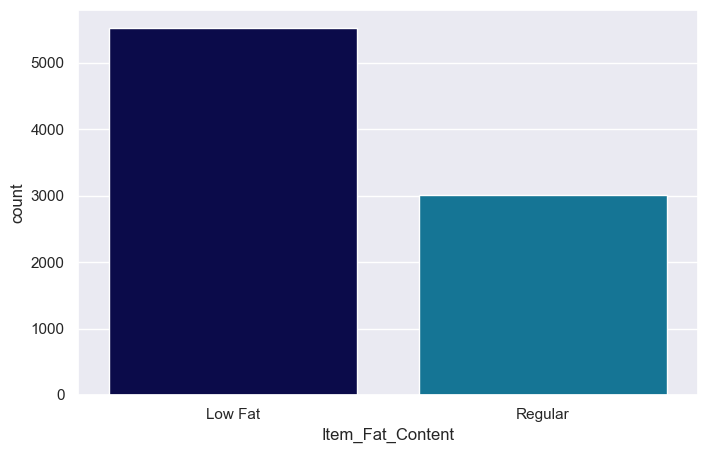

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='Item_Fat_Content',data=data,palette='ocean')

**Inference** - The Items bought are more of Low Fat.

* Item Type

<Axes: xlabel='Item_Type', ylabel='count'>

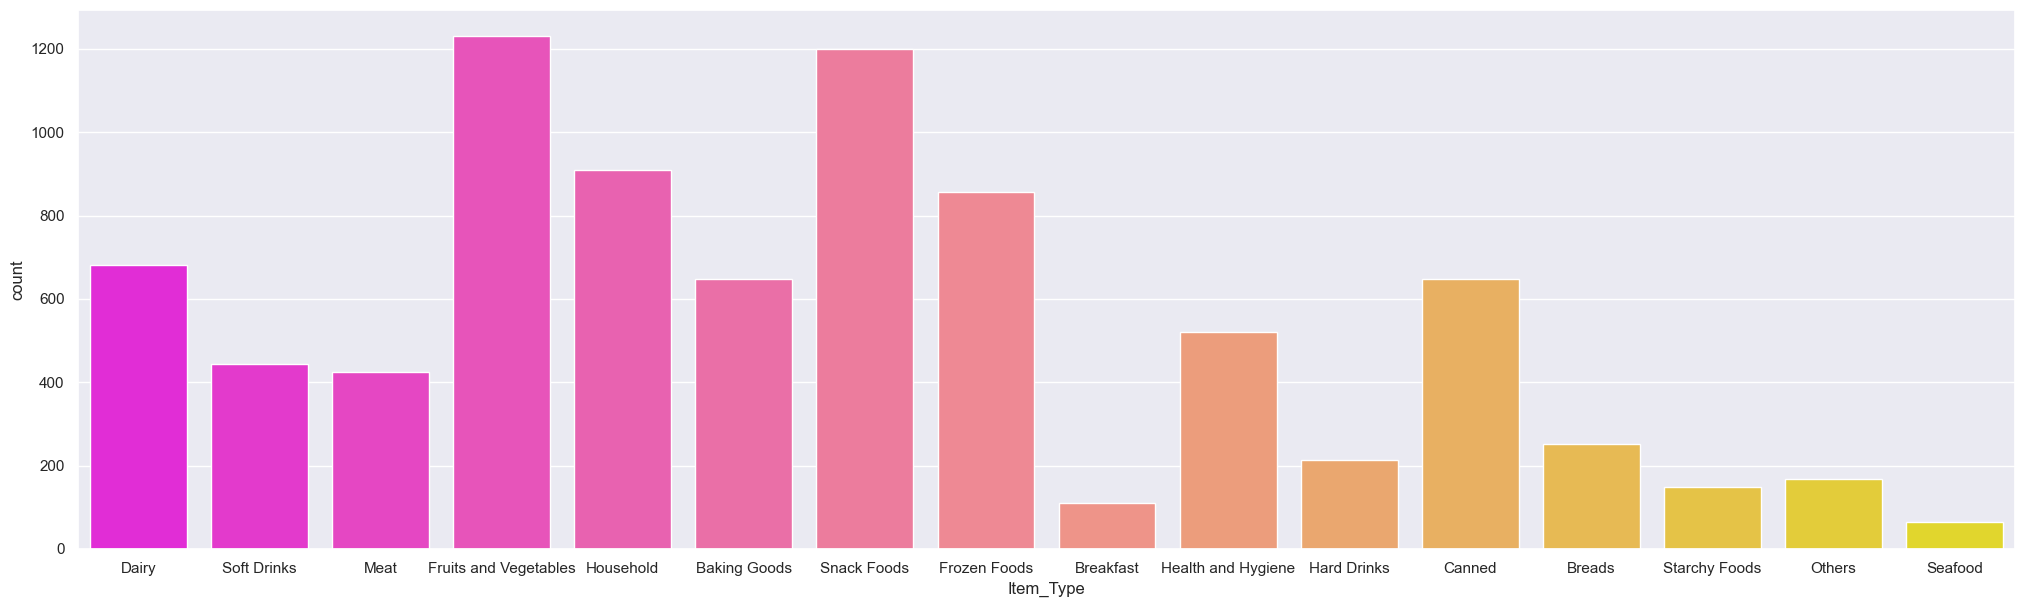

In [36]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=data,palette='spring')

**Inference** -     
* Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
* Snacks have good sales too.

* Outlet Size

<Axes: xlabel='Outlet_Size', ylabel='count'>

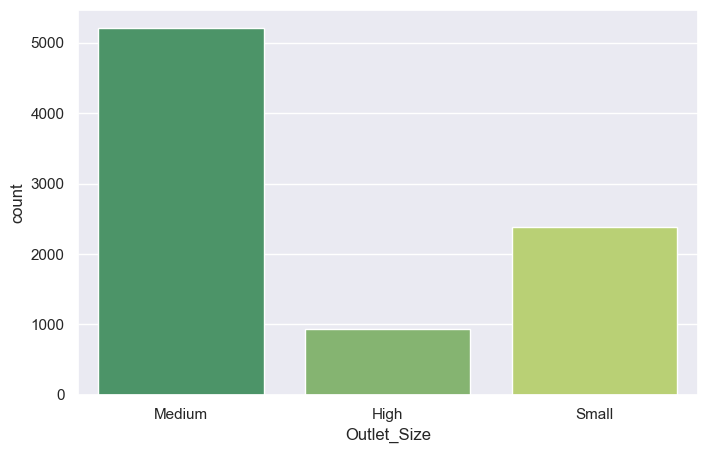

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size',data=data,palette='summer')

**Inference** - The outlets are more of Medium Size

* Outlet Location Size

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

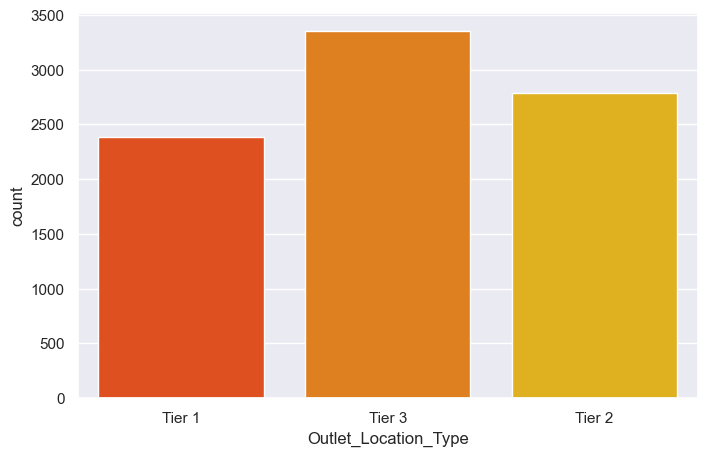

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=data,palette='autumn')

**Inference** - The Outlets are maximum in number in Tier 3 Cities.

* Outlet Type

<Axes: xlabel='Outlet_Type', ylabel='count'>

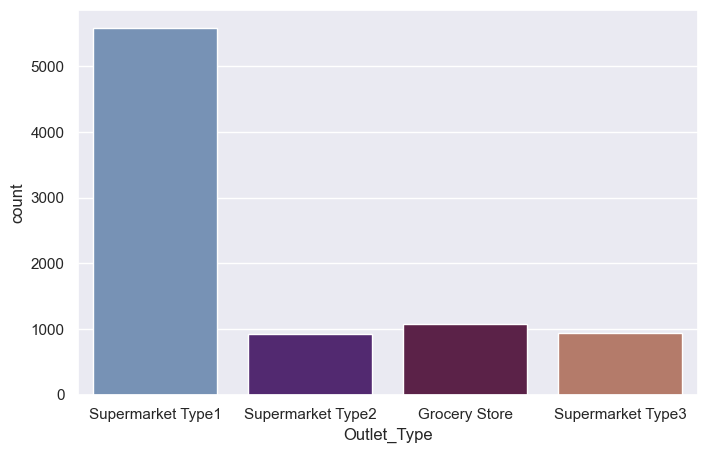

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=data,palette='twilight')

**Inference** - The outlets are more of Supermarket Type1.

<Axes: xlabel='Years_Established', ylabel='count'>

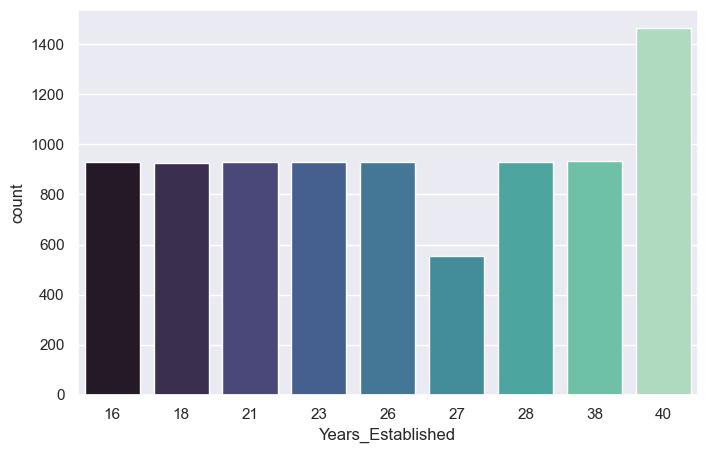

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=data,palette='mako')

**Inference** - The Outlets are more of established and running from 35 years.

**Feature Engineering**

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,27
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38


In [42]:
# Convert Categories columns to numberic (string type to numeric)
le = LabelEncoder()
x = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in x:
    data[i] = le.fit_transform(data[i])



In [43]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,26
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,16
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,26
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,27
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,38


* We can drop the unwanted columns as they don't have a impact on the output

In [44]:
data = data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)


In [45]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

In [46]:
X= data[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y= data['Item_Outlet_Sales']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

**Feature Scaling**

In [48]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

**Model Building**

* Using Linear Regression

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_, features).sort_values()

Coeficient: Item_Visibility        -1600.625081
Outlet_Location_Type    -435.491074
Outlet_Size             -340.852291
Years_Established         -1.517854
Item_Weight                0.136562
Item_Type                  1.701081
Item_MRP                  15.621770
Item_Fat_Content          34.981870
Outlet_Type             1009.078566
dtype: float64


In [54]:
y_pred

array([1260.2272969 , 2165.49688674, 3664.60084023, ..., 4349.74601985,
       3610.13991866, 5157.33548692], shape=(1705,))

In [55]:
coef2

Item_Visibility        -1600.625081
Outlet_Location_Type    -435.491074
Outlet_Size             -340.852291
Years_Established         -1.517854
Item_Weight                0.136562
Item_Type                  1.701081
Item_MRP                  15.621770
Item_Fat_Content          34.981870
Outlet_Type             1009.078566
dtype: float64

<Axes: >

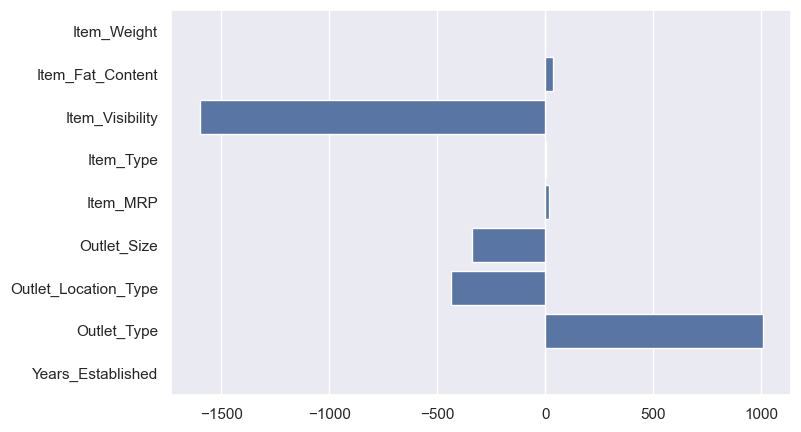

In [56]:
plt.figure(figsize=(8,5))
sns.barplot(x= LR.coef_, y= features)

* Predicting the charges


In [57]:
y_pred = LR.predict(X_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
6544,932.1200,1260.227297
1877,1930.1542,2165.496887
2933,3119.9388,3664.600840
8116,71.9064,-1089.031287
6240,2021.3688,440.015232


**Evaluation Metrics**

* R-Squared:
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [58]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.49471628502968834

* **MAE and MSE**


> MAE measures the average magnitude of the errors in a set of predictions. It the difference between model prediction and actual value


> MSE is similar to MSE but instead of using absolute values the difference of actual and predicted is squared





In [59]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [60]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 932.9430372238921
mean squared error: 1561490.3375619513


*Note -  MAE, MSE are negatively-oriented scores, which means lower values are better.*

* RMSE


> It is the square root of the average of the squared difference between predicted and actual observation



In [61]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1249.5960697609253


*Note -  RMSE are negatively-oriented scores, which means lower values are better.*

**Conclusion**



* Item_MRP maximises the Outlet sales.
* Outlet Type i.e SuperMarket or Grocery Store also depicts the Outlet Sales.
* Years Established plays an important role as they build credibility in the market.